Провести ряд экспериментов с архитектурой нейронной сети:

Исследовать влияние количества слоев conv2d.
Исследовать влияние количества нейронов (фильтров) в слоях conv2d.
Исследовать влияние MaxPooling2D в сети.
Исследовать влияние Dropout.
Написать выводы по результатам проведенных тестов.

# Импорт библиотек

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

%matplotlib inline

# Дополнительный функции

## Вывод картинок

In [ ]:
def show_image(fig, axs):
  for ii in range(10):
    label_index = np.where(y_train==ii)[0]
    index = random.choice(label_index)
    image = x_train[index]
    axs[ii].imshow(Image.fromarray(image), cmap="gray")
  plt.show()

## Вывод графиков

In [ ]:
def showAccuracy(history):
  plt.plot(history.history["accuracy"],
           label="Точность на обучающей выборке.")
  plt.plot(history.history["val_accuracy"],
           label="Точность на проверочной выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Точность модели")

  plt.legend()
  plt.show()


def showLoss(history):
  plt.plot(history.history["loss"],
           label="Ошибка на обучающей выборке.")
  plt.plot(history.history["val_loss"],
           label="Ошибка на проверяющей выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Ошибка обучения")

  plt.legend()
  plt.show()

## Создание модели

In [ ]:
def create_model(n_conv2d=2,
                 neurons_conv2d=32,
                 max_pool=True,
                 drop_one=0.3,
                 drop_two=0.2):
  model = Sequential()
  model.add(BatchNormalization(input_shape=(28, 28, 1)))

  for ii in range(n_conv2d):
    model.add(Conv2D(neurons_conv2d, (3, 3), padding="same", activation="relu"))

  if max_pool:
    model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  
  model.add(Dropout(drop_one))
  model.add(Dense(250, activation="relu"))
  model.add(Dropout(drop_two))
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  model.summary()

  return model


# Импорт базы для обучения

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
print(x_train.shape)


(60000, 28, 28)


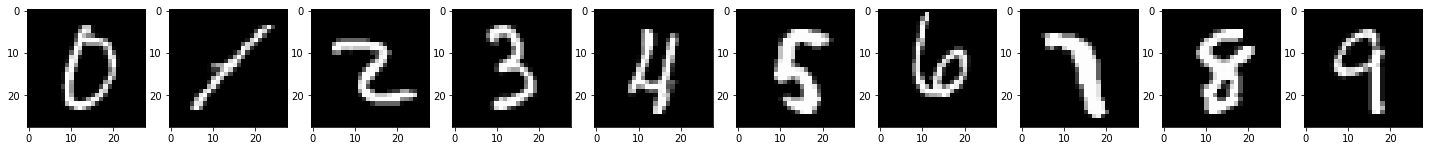

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
show_image(fig, axs)

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Обучение модели

## Константы

In [ ]:
batch = 128
epochs = 20

## Базовая модель (1 слой conv2D, 32 нейрона, есть MaxPooling слой, есть оба Dropout слоя)

In [ ]:
model = create_model()
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_data=(x_test, y_test),
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 250)              

## Графики обучения модели

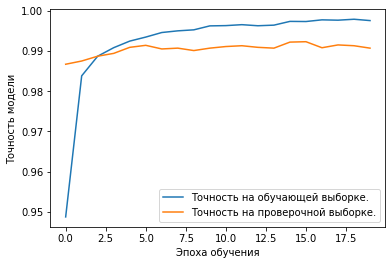

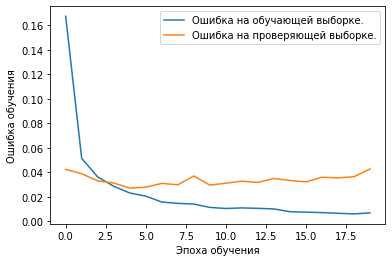

In [ ]:
showAccuracy(history)
showLoss(history)

# Эксперименты

### Точность каждой модели

In [ ]:
list_accuracy = list()

## Эксперимент 1 (1 слой conv2D)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               1568250   
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)              

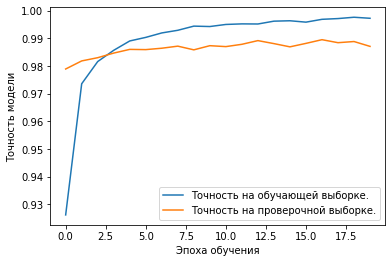

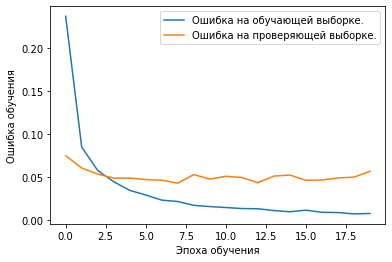

313/313 [==============================] - 2s 7ms/step - loss: 0.0525 - accuracy: 0.9885


In [ ]:
model = create_model(n_conv2d=1)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 2 (3 слоя conv2D)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6272)             

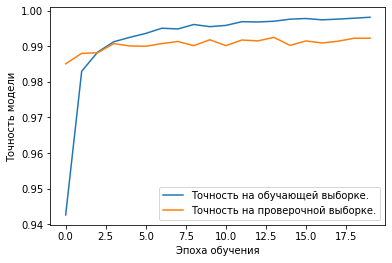

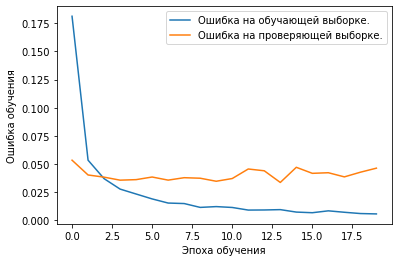

313/313 [==============================] - 7s 24ms/step - loss: 0.0380 - accuracy: 0.9921


In [ ]:
model = create_model(n_conv2d=3)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 3 (20 нейронов в слое conv2D)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)              

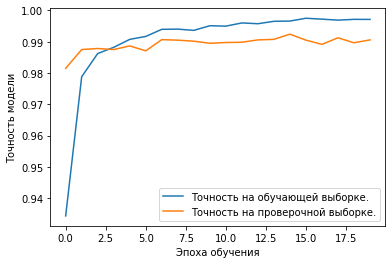

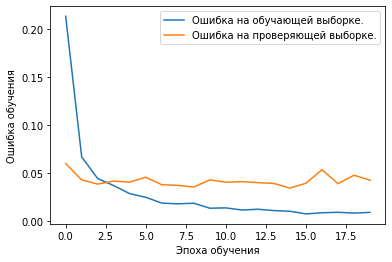

313/313 [==============================] - 4s 13ms/step - loss: 0.0363 - accuracy: 0.9904


In [ ]:
model = create_model(neurons_conv2d=20)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 4 (80 нейронов в слое conv2D)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9800)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 250)              

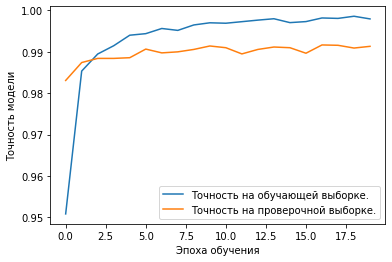

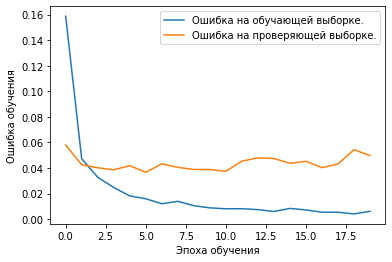

313/313 [==============================] - 10s 31ms/step - loss: 0.0404 - accuracy: 0.9905


In [ ]:
model = create_model(neurons_conv2d=50)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 5 (Нет MaxPooling слоя)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               6272250   
_________________________________________________________________
dropout_11 (Dropout)         (None, 250)              

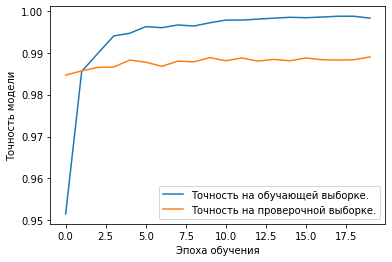

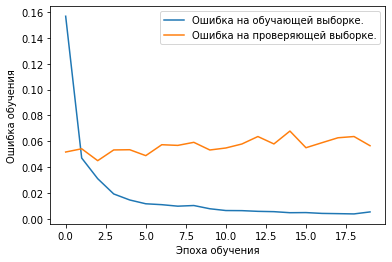

313/313 [==============================] - 7s 22ms/step - loss: 0.0562 - accuracy: 0.9882


In [ ]:
model = create_model(max_pool=False)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 6 (Есть только первый Dropout слой)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6272)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 250)              

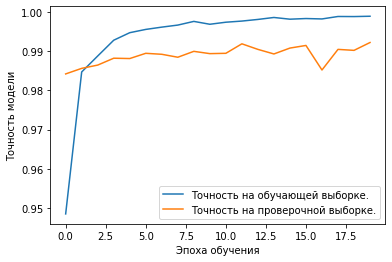

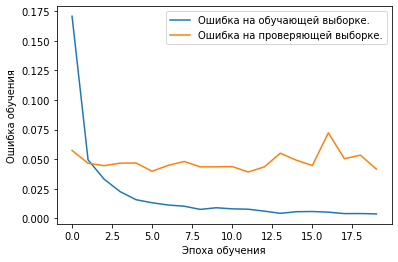

313/313 [==============================] - 5s 15ms/step - loss: 0.0363 - accuracy: 0.9917


In [ ]:
model = create_model(drop_one=0.25, drop_two=0)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 7 (Есть только второй Dropout слой)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6272)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 250)              

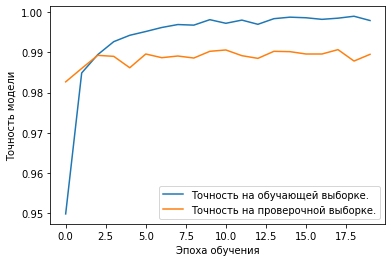

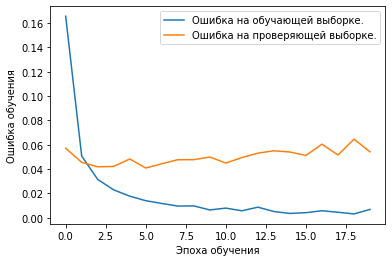

313/313 [==============================] - 5s 17ms/step - loss: 0.0458 - accuracy: 0.9906


In [ ]:
model = create_model(drop_one=0, drop_two=0.25)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

## Эксперимент 8 (Нет Dropout слоев)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 6272)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 250)             

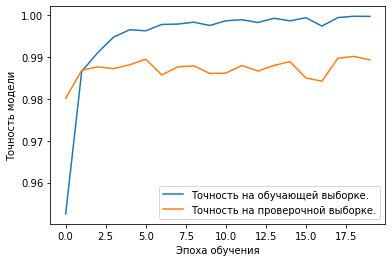

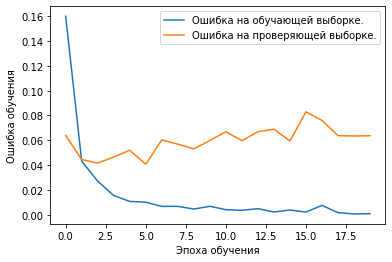

313/313 [==============================] - 5s 15ms/step - loss: 0.0505 - accuracy: 0.9904


In [ ]:
model = create_model(drop_one=0, drop_two=0)
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=1)

showAccuracy(history)
showLoss(history)
score = model.evaluate(x_test, y_test, verbose=1)
list_accuracy.append(score[1])

# Вывод таблицы точности

             Точность модели
Эксперимент                 
Экспр. 1              0.9885
Экспр. 2              0.9921
Экспр. 3              0.9904
Экспр. 4              0.9905
Экспр. 5              0.9882
Экспр. 6              0.9917
Экспр. 7              0.9906
Экспр. 8              0.9904


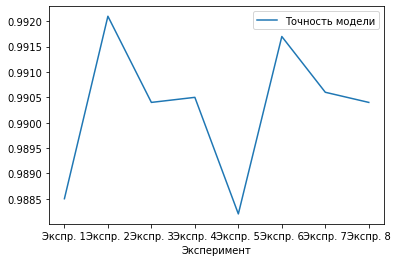

In [ ]:
inds = [f"Экспр. {i}" for i in range(1, 9)]
table = pd.DataFrame({"Точность модели": list_accuracy},
                     index=inds)

table.index.name = "Эксперимент"
print(table)

table.plot()
plt.show()